### Naive Bayes

En este notebook entrenaremos dos modelos de MultinomialNB, uno con el mismo preprocesamiento del dataset realizado en la primera parte del TP, y el segundo con la función `preprocessing_significantes`

In [1]:
# Modelo
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.naive_bayes import BernoulliNB, ComplementNB

# Preprocessing
import utils
import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

# Otros
import pandas as pd
import numpy as np

In [7]:
df = utils.get_data()

In [8]:
params = { 'alpha': np.linspace(0,1,1000) }
model = MultinomialNB()

In [9]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('tiene_alto_valor_adquisitivo',1), df['tiene_alto_valor_adquisitivo'], random_state=112)
X_train, X_test = preprocessing.preprocessing_base_parte_1(X_train, X_test)

In [11]:
scaler = MinMaxScaler() # Por default, en [0,1]

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [12]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1981s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1360s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1403s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:  

CPU times: user 5.74 s, sys: 443 ms, total: 6.18 s
Wall time: 33.5 s


[Parallel(n_jobs=-1)]: Done 4993 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   33.3s finished


In [13]:
gscv.best_params_

{'alpha': 0.984984984984985}

In [14]:
score

0.8426126898738933

In [15]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      6182
           1       1.00      0.02      0.03      1959

    accuracy                           0.76      8141
   macro avg       0.88      0.51      0.45      8141
weighted avg       0.82      0.76      0.66      8141



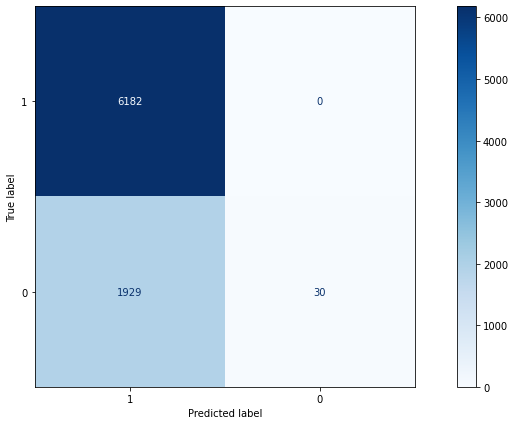

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

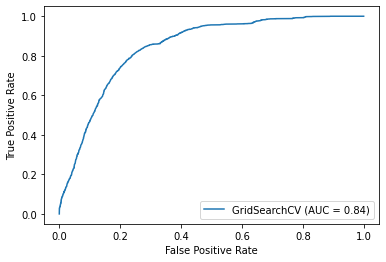

In [17]:
plot_roc_curve(gscv, X_test, y_test)

### Preprocessing Significantes

In [2]:
df = utils.get_data()

In [3]:
params = { 'alpha': np.linspace(0,1,1000) }
model = MultinomialNB()

In [4]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [5]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=112)
X_train, X_test = preprocessing.preprocessing_significantes(X_train, X_test, 0.9)

/home/nicolascontinanza/Desktop/FIUBA/Datos/tp-datos-1c2021-de-angelis-riva-continanza/Parte2/preprocessing.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ganancia_perdida_declarada_bolsa_argentina'] = X_train['ganancia_perdida_declarada_bolsa_argentina'].apply(_log_scale)
/home/nicolascontinanza/Desktop/FIUBA/Datos/tp-datos-1c2021-de-angelis-riva-continanza/Parte2/preprocessing.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ganancia_perdida_declarada_bolsa_argentina'] = X_test[

In [6]:
scaler = MinMaxScaler() # Por default, en [0,1]

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [7]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1899s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1390s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    5.9s
[Parallel(n_jo

CPU times: user 10 s, sys: 899 ms, total: 10.9 s
Wall time: 57.5 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   57.3s finished


In [8]:
gscv.best_params_

{'alpha': 0.001001001001001001}

In [9]:
score

0.865579795051219

In [10]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6182
           1       0.00      0.00      0.00      1959

    accuracy                           0.76      8141
   macro avg       0.38      0.50      0.43      8141
weighted avg       0.58      0.76      0.66      8141



/home/nicolascontinanza/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


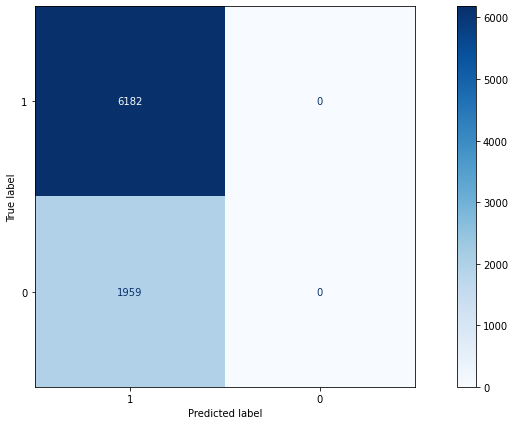

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

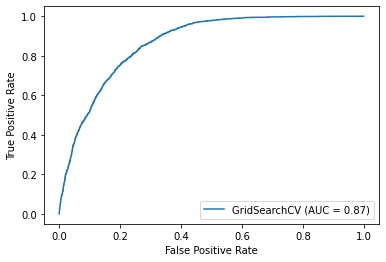

In [12]:
plot_roc_curve(gscv, X_test, y_test)

### Preprocessing Equilibrado

In [2]:
df = utils.get_data()

In [3]:
params = { 'alpha': np.linspace(0,1,1000) }
model = MultinomialNB()

In [4]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [6]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=112)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train, y_train, X_test, y_test = preprocessing.preprocessing_equilibrado(X_train, X_test, y_train, y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24420, 88)
(8141, 88)
(24420,)
(8141,)
(11764, 88)
(8141, 88)
(11764,)
(8141,)


In [7]:
scaler_train = MinMaxScaler() # Por default, en [0,1]
scaler_test = MinMaxScaler() # Por default, en [0,1]

X_train = pd.DataFrame(scaler_train.fit_transform(X_train))
X_test = pd.DataFrame(scaler_test.fit_transform(X_test))
#X_test = pd.DataFrame(scaler.transform(X_test))
#X_test = scaler_test.fit_transform(X_test.values.reshape(-1, 1))

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(11764, 88)
(8141, 88)
(11764,)
(8141,)


In [ ]:
%%time
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

In [27]:
gscv.best_params_

{'alpha': 0.6416416416416416}

In [28]:
print(classification_report(y_test,gscv.predict(X_test)))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 81 is different from 78)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 81 is different from 78)

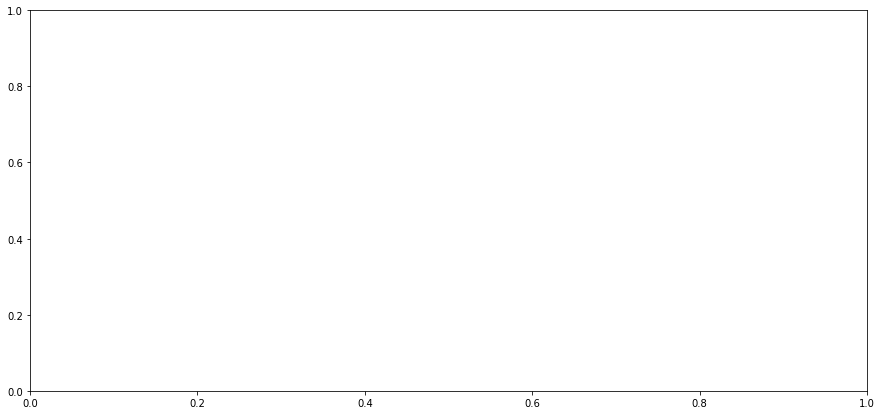

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

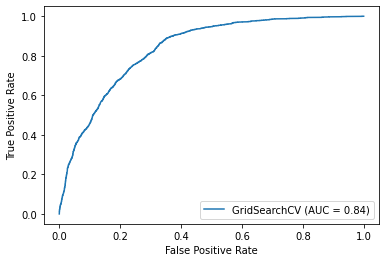

In [37]:
plot_roc_curve(gscv, X_test, y_test)